In [132]:
from PIL import Image as pil
from selenium import webdriver

In [9]:
url = "https://www.youtube.com/watch?v=yL2xVs6uI0s&t=50s"
driver = webdriver.Chrome()
driver.get(url)
driver.save_screenshot("datas/screeshot.png")
driver.quit()

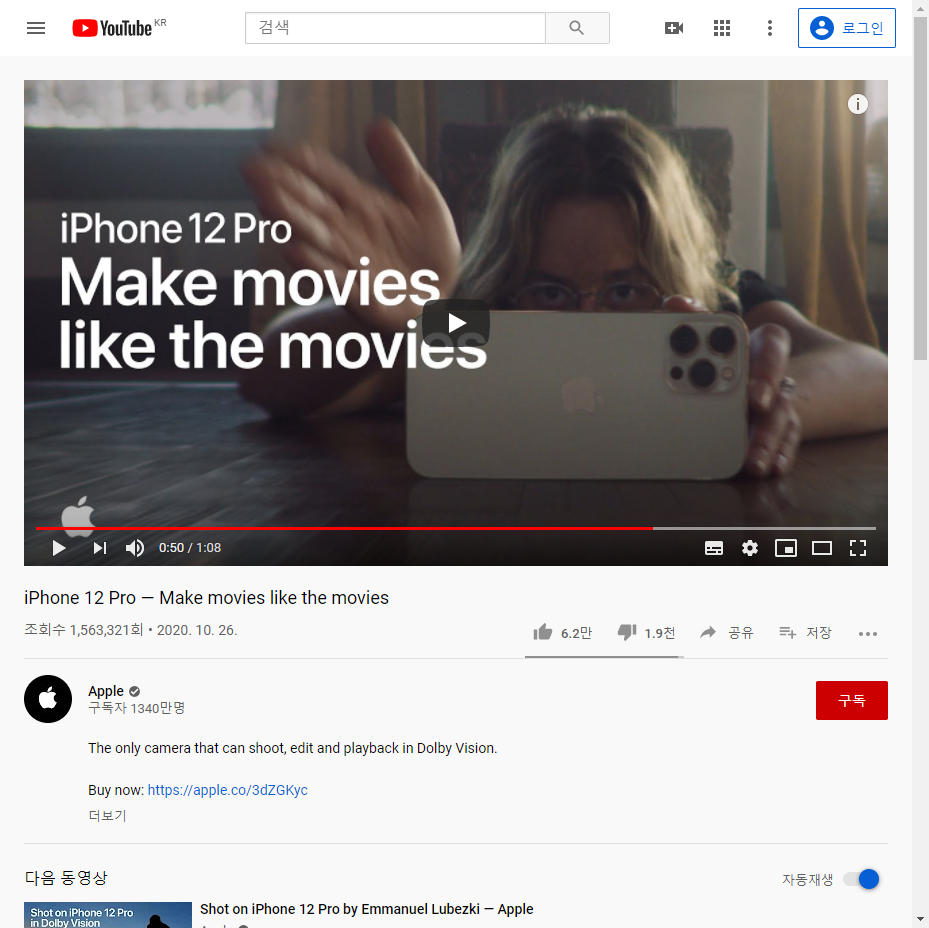

In [14]:
pil_img = pil.open("datas/screeshot.png")
pil_img

{'x': 24, 'y': 80} {'height': 486, 'width': 864}


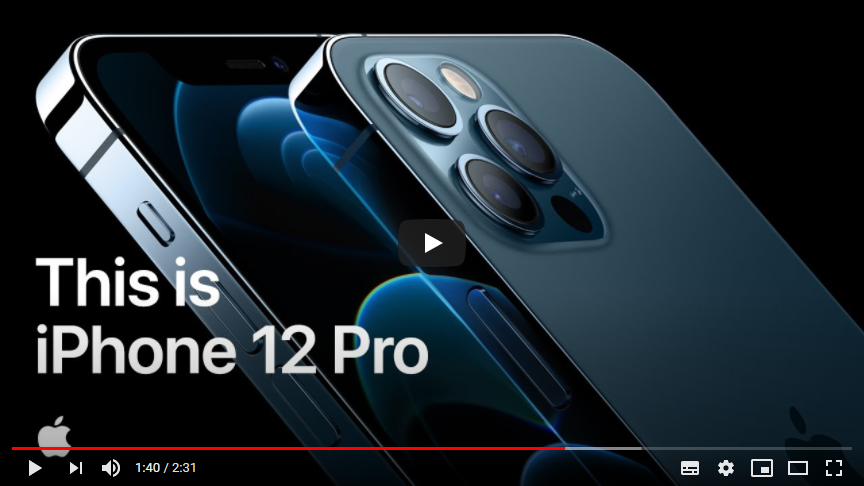

In [42]:
url = "https://www.youtube.com/watch?v=cnXapYkboRQ&t=100s"
driver = webdriver.Chrome()
driver.get(url)
driver.save_screenshot("datas/screeshot.png")
element = driver.find_element_by_css_selector("#movie_player")
location = element.location
size = element.size
print(location, size)
driver.quit()

left = location["x"]
top = location["y"]
right = left + size["width"]
bottom = top + size["height"]
area = (left, top, right, bottom)
pil_img = pil.open("datas/screeshot.png")
pil_element_img = pil_img.crop(area)
pil_element_img

In [43]:
pil_element_img.save("datas/screenshot_element.png")

In [45]:
pil_element_img.size

(864, 486)

(320, 180)


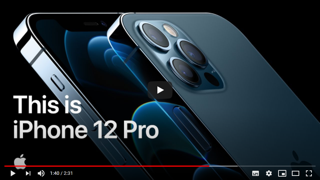

In [46]:
pil_element_img.thumbnail((320, 180))
print(pil_element_img.size)
pil_element_img

### Fake Useragent

In [48]:
from fake_useragent import UserAgent

In [65]:
options = webdriver.ChromeOptions()
options.add_argument("user-agent={}".format(UserAgent().chrome))
driver = webdriver.Chrome(options=options)
agent = driver.execute_script("return navigator.userAgent;")
print(agent)
driver.quit()

Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1667.0 Safari/537.36


### Headless

In [68]:
options = webdriver.ChromeOptions()
options.add_argument("headless")
driver = webdriver.Chrome(options=options)
driver.get('https://www.fastcampus.co.kr/')
print(driver.title)
driver.quit()

커리어 성장을 위한 최고의 실무교육 아카데미 | 패스트캠퍼스


In [70]:
options = webdriver.ChromeOptions()
options.add_argument("headless")
driver = webdriver.Chrome(options=options)
driver.get('https://cafe.naver.com/fcbarcelona10')
print(driver.title)
driver.quit()

més que un club :: Barcelonista : 네이버 카페


### Video Download

In [128]:
def download(title, link):
    response = requests.get(link, stream=True)
    save_path, size = "datas/{}".format(title), 0
    with open(save_path, "wb") as f:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                size += 1024
                f.write(chunk)
    return size

In [129]:
url = "https://www.youtube.com/watch?v=VF-WANzs624"

In [130]:
link = "https://r1---sn-uvu-c33el.googlevideo.com/videoplayback?expire=1603956892&ei=PByaX--HItC18gOw14OgBw&ip=101.51.59.88&id=o-AEQNTjm7f3_XJnItFRQUsN2RnqghodvJuAO7dhDVq1oG&itag=22&source=youtube&requiressl=yes&mh=G8&mm=31%2C29&mn=sn-uvu-c33el%2Csn-uvu-c33e6&ms=au%2Crdu&mv=m&mvi=1&pcm2cms=yes&pl=24&initcwndbps=1082500&vprv=1&mime=video%2Fmp4&ratebypass=yes&dur=36.060&lmt=1602636936826214&mt=1603935156&fvip=1&beids=9466585&c=WEB&txp=5532434&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cvprv%2Cmime%2Cratebypass%2Cdur%2Clmt&sig=AOq0QJ8wRAIgO6xR0C0DusUZmdjoLg5xgPcDqmq-BdkHfPWKEE_MHNkCIGb6w6-Q_1aiUQftge-cze5OXKtMcbBzcL7GvvCsZ4nH&lsparams=mh%2Cmm%2Cmn%2Cms%2Cmv%2Cmvi%2Cpcm2cms%2Cpl%2Cinitcwndbps&lsig=AG3C_xAwRQIgZFHYJuNYRQ1CMx-lnJElZvseGeBNmH5HTzcJokciEXQCIQDvH0WrBVC-3E07LyhhdqChaKUa40kZ2gz1ibccyyXahg%3D%3D&title=Introducing%20HomePod%20mini%20%E2%80%94%20Apple"

In [131]:
title = "Introducing HomePod mini — Apple.mp4"

size = download(title, link)
print("{} MB".format(size/1024/1024))

2.2763671875MB


### Naver Articles Crawling

In [161]:
def get_articles(category, date, page):
    url = "https://news.naver.com/main/list.nhn?\
    mode=LSD&mid=sec&sid1={}&date={}&page={}".format(category, date, page)
    driver = webdriver.Chrome()
    driver.get(url)
    articles = driver.find_elements_by_css_selector(".list_body.newsflash_body > ul > li")
    datas = []
    for article in articles:
        title = articles[0].find_element_by_css_selector("dt:not(.photo) > a").text
        link = articles[0].find_element_by_css_selector("dt:not(.photo) > a").get_attribute("href")
        response = requests.get(link)
        dom = BeautifulSoup(response.content, "html.parser")
        content = dom.select_one("#articleBodyContents").text\
        .replace("\n","").replace("\'","").split("{}")[1].strip()
        datas.append({
            "title":title,
            "link":link,
            "content":content,
            "category":category,
        })
    driver.quit()
    
    return pd.DataFrame(datas)

In [ ]:
categories = {
    100: "정치",
    101: "경제",
    102: "사회",
    103: "생활/문화",
    104: "세계",
    105: "IT/과학",
}

In [ ]:
dfs = []
for category in categories:    
    for page in range(1, 6):
        print(category, 20191121, page)
        df = get_articles(category, date, page)
        dfs.append(df)
        
articles_df = pd.concat(dfs, ignore_index=True)
articles_df.tail()

In [ ]:
articles_df.to_csv("articles.csv", index = False, encoding="utf-8-sig")